Index(['date', 'title', 'text', 'subreddit', 'url', 'Sentiment'], dtype='object')


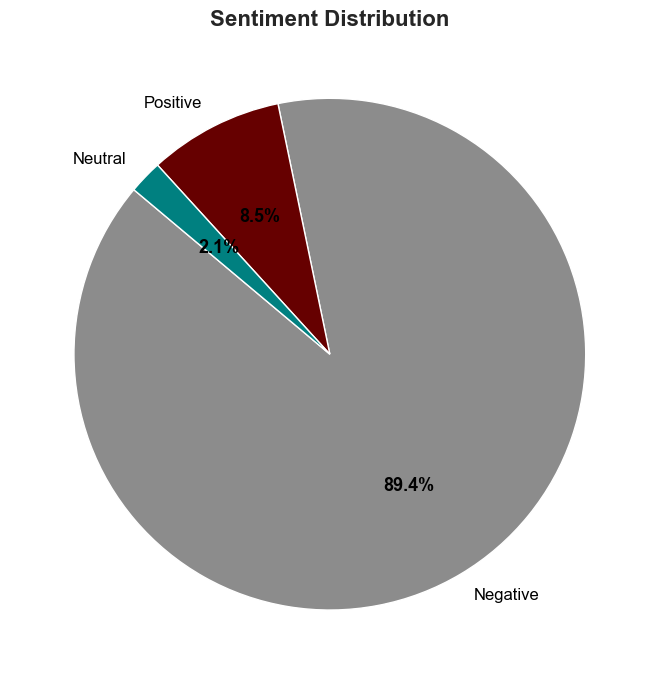

C:\Users\USER\AppData\Local\Temp\ipykernel_9728\3891954102.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#8c8c8c', '#660000', '#008080'])


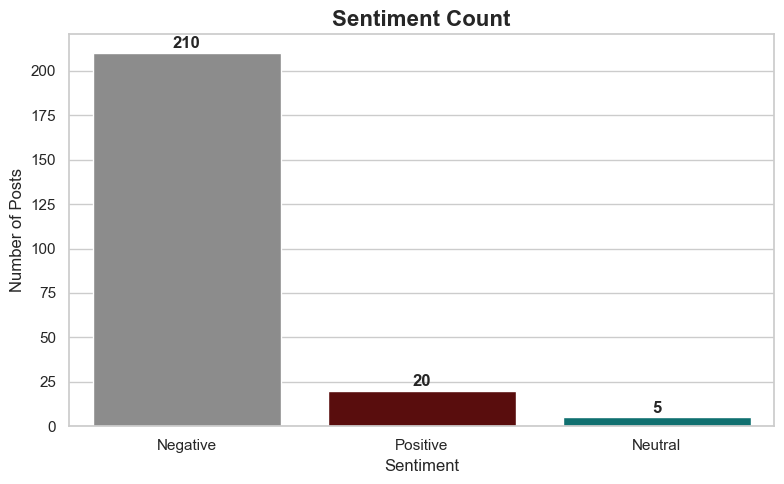

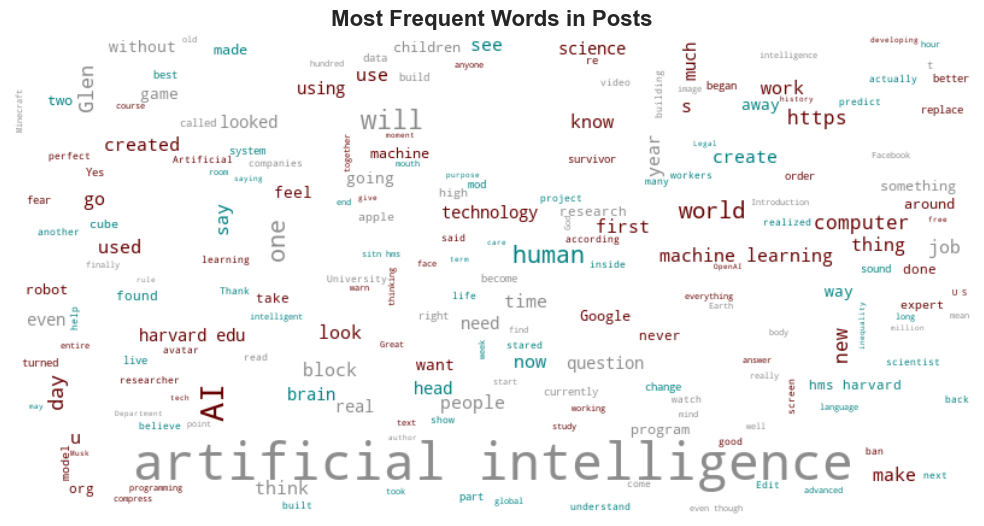

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

df = pd.read_csv('../src/data/output_sentiment.csv')
print(df.columns)

sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

colors = ['#8c8c8c', '#660000', '#008080']

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)
plt.setp(autotexts, size=13, weight="bold")
plt.title("Sentiment Distribution", fontsize=16, fontweight='bold')

plt.ylabel("")

plt.tight_layout()

os.makedirs('../notebooks/visualizations', exist_ok=True)

plt.savefig('../notebooks/visualizations/sentiment_pie_chart.png', dpi=300)
plt.show()


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#8c8c8c', '#660000', '#008080'])

plt.title('Sentiment Count', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

os.makedirs('../notebooks/visualizations', exist_ok=True)
plt.tight_layout()
plt.savefig('../notebooks/visualizations/sentiment_bar_chart.png', dpi=300)
plt.show()

import random
from wordcloud import WordCloud, STOPWORDS


df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

text_data = " ".join(df['content'].dropna().astype(str))

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#8c8c8c', '#660000', '#008080']
    return random.choice(colors)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=200,
    color_func=custom_color_func
).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Posts', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/visualizations/sentiment_wordcloud.png', dpi=300)
plt.show()







